# Diabetes prediction using logistic regression

In [1]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the required sklearn library

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
#read the csv file 

data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [42]:
data["Outcome"].value_counts()   

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
#some EDA opeartion with the data.

data.describe()                   # gives the statistical information of the dataset.
                                  # here some of the mean value is zero so we have to replace them with the mean value.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()                  #checking the null values.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

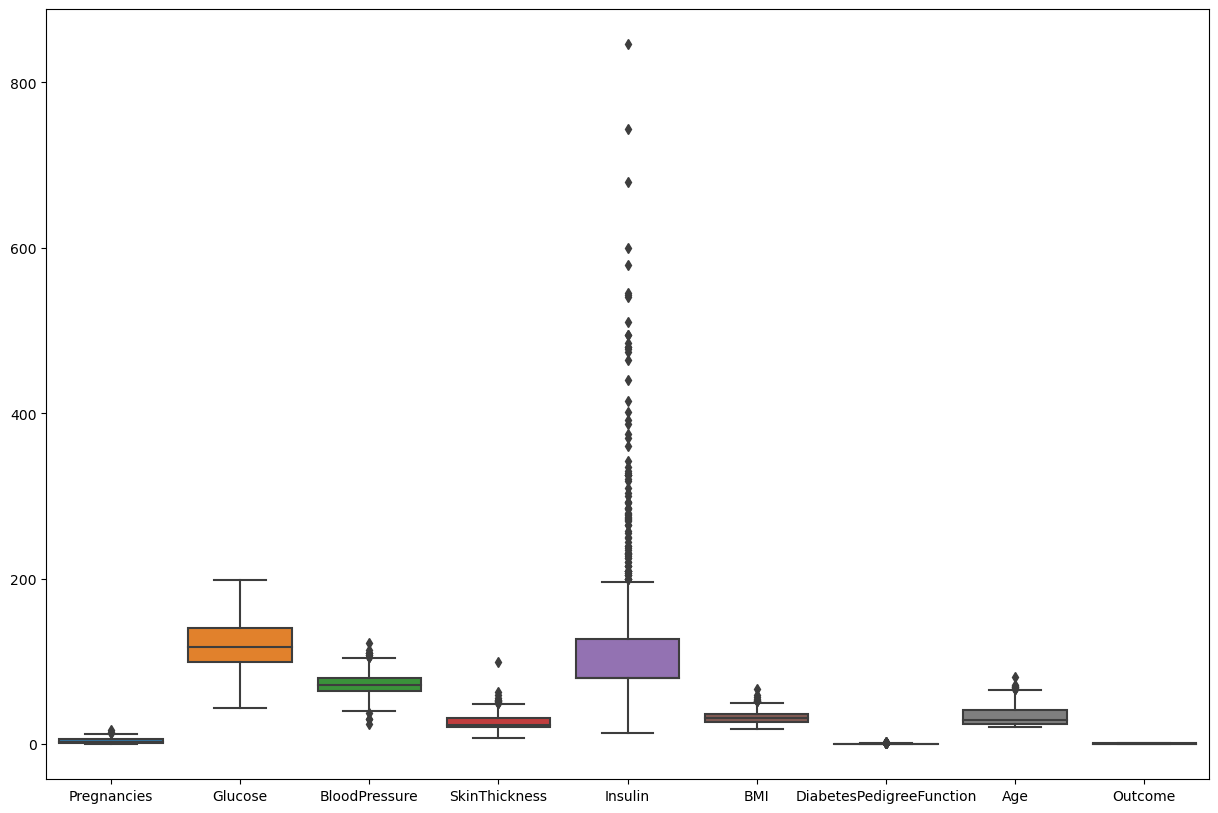

In [9]:
#how to check the outlier.

plt.figure(  figsize=(15,10)  )
sns.boxplot(data=data)                    # observation: here we have seen huge number of outlier in the dataset.that can be handled in two ways.

                                          # process_1:   Do some feature engg and use IQR 
                                          # process_2:   Just standardize the data.

<AxesSubplot: xlabel='Insulin', ylabel='Density'>

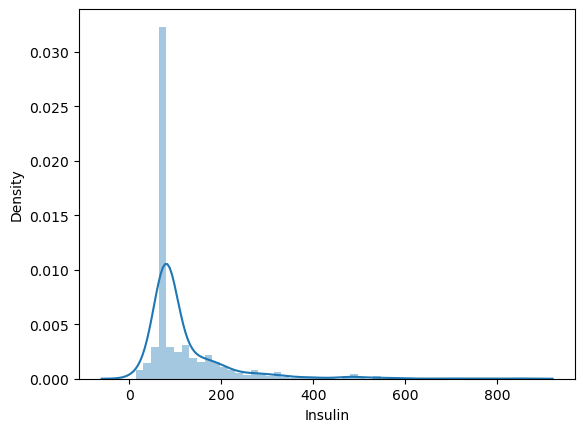

In [10]:
#we will apply the Standardscaler operation here.

import warnings
warnings.filterwarnings("ignore")

sns.distplot(data["Insulin"])        #here the data shows the gaussian distrubution.

In [11]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data[['Outcome']]

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [12]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [14]:
##standard Scaling- Standardization

def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    
    return X_train_scaled, X_test_scaled

In [15]:
X_train_scaled, X_test_scaled= scaler_standard(X_train,X_test)

In [16]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [17]:
X_test_scaled

array([[-0.82986389,  2.56591881,  0.27922165, ...,  1.46903995,
         2.78665365, -0.96584853],
       [-0.53768687, -0.49968691,  0.11084355, ...,  0.13573925,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.53266275, -0.89942504, ...,  0.19308552,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.43304331, -1.06780314, ..., -1.03985921,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.20007091,  0.44759974, ..., -1.65633158,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.13280114,  0.44759974, ..., -0.72445475,
        -0.63396981,  0.28489057]])

# apply the logistic regression

In [18]:
#applying the  logistic regression

log_regressor = LogisticRegression()
log_regressor.fit(X_train_scaled,y_train)             #   "log_regressor"   is the object,it is the classifier basically.

LogisticRegression()

In [19]:
# prediction   (compare the    y_pred     with the   y_test )

y_pred=log_regressor.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [20]:
log_regressor.predict_proba(X_test_scaled)

array([[0.03505922, 0.96494078],
       [0.84678832, 0.15321168],
       [0.91329556, 0.08670444],
       [0.33896998, 0.66103002],
       [0.88855034, 0.11144966],
       [0.96833054, 0.03166946],
       [0.24399089, 0.75600911],
       [0.13289782, 0.86710218],
       [0.59807894, 0.40192106],
       [0.64060854, 0.35939146],
       [0.41347103, 0.58652897],
       [0.02837582, 0.97162418],
       [0.73771963, 0.26228037],
       [0.83574109, 0.16425891],
       [0.90464487, 0.09535513],
       [0.86235248, 0.13764752],
       [0.12854262, 0.87145738],
       [0.97855809, 0.02144191],
       [0.63171815, 0.36828185],
       [0.75275564, 0.24724436],
       [0.34836093, 0.65163907],
       [0.5517156 , 0.4482844 ],
       [0.9200956 , 0.0799044 ],
       [0.95385445, 0.04614555],
       [0.95390632, 0.04609368],
       [0.65724974, 0.34275026],
       [0.96394679, 0.03605321],
       [0.08318847, 0.91681153],
       [0.9067464 , 0.0932536 ],
       [0.86902446, 0.13097554],
       [0.

In [21]:
#check the confusion matrix, accuracy score,classification report.

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report          #classification test means precision,recall
print(confusion_matrix(y_test,y_pred))                                                     #confusion matrix

[[117  13]
 [ 26  36]]


In [22]:
print(accuracy_score(y_test,y_pred))

0.796875


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



# Hyper parameter tunning 

1.Grid search CV

In [24]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [25]:
logreg = LogisticRegression()                        #  "logreg"    is the object.

clf = GridSearchCV(logreg,                           # model, "clf"   is the objectt of the "Gridsearchcv"
                   param_grid = parameters,          # hyperparameters
                   scoring='accuracy',               # metric for scoring
                   cv=10)                            # number of folds 

In [26]:
clf.fit(X_train_scaled,y_train)                      # fitting the model

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_                                   #finding the best parameter.

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
clf.best_score_                                    #How well the model performs against the test data.

0.763793103448276

In [29]:
#prediction

y_pred1 = clf.predict(X_test_scaled)
y_pred1

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [30]:
conf_mat = confusion_matrix(y_test,y_pred1)             #confusion matrix
conf_mat

array([[117,  13],
       [ 26,  36]])

In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [33]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [34]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [35]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

# .............. applying the best parameters to see the result......result has to be the same

In [36]:
### applying the best fiited parameters (output has to be the same with the previous data )

logreg1 = LogisticRegression(  C=1.0, penalty='l2', solver= 'liblinear' ) 

logreg1.fit(X_train_scaled,y_train)

LogisticRegression(solver='liblinear')

In [37]:
y_pred2=logreg1.predict(X_test_scaled)
y_pred2

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [38]:
confusion_matrix(y_test,y_pred2)             # confusion matrix

array([[117,  13],
       [ 26,  36]])

In [39]:
accuracy_score(y_test,y_pred2)

0.796875

In [40]:
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.82      0.90      0.86       130\n           1       0.73      0.58      0.65        62\n\n    accuracy                           0.80       192\n   macro avg       0.78      0.74      0.75       192\nweighted avg       0.79      0.80      0.79       192\n'

2.randomized CV

In [591]:
## case 2 (randomized CV)

from sklearn.model_selection import RandomizedSearchCV

In [592]:
classifier=LogisticRegression()

In [593]:
# defining the parameter.
parametrs={'penalty':('l1','l2','elasticnet',None), 'C':[1,10,20] }

In [594]:
random_clf=RandomizedSearchCV(   LogisticRegression(),   param_distributions=parametrs,    cv=25)           #random_clf is the object

In [595]:
#fit the train data.
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=25, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet',
                                                    None)})

In [596]:
random_clf.best_params_                #finding the best parameters.

{'penalty': 'l2', 'C': 1}

In [598]:
# redefine the classifier

classifier=LogisticRegression(C=1, penalty=None)  

In [599]:
# fitting the data set after redefining the classifier
classifier.fit(X_train_scaled,y_train)

LogisticRegression(C=1, penalty=None)

In [600]:
#prediction

y_pred4=classifier.predict(X_test_scaled)
y_pred4

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [601]:
#find the confusion matrix ,accuracy score, classification report (precision,recall, f1 score)

conf_mat1 = confusion_matrix(y_test,y_pred4)             #confusion matrix
conf_mat1

array([[117,  13],
       [ 26,  36]])

In [602]:
true_positive = conf_mat1[0][0]
false_positive = conf_mat1[0][1]
false_negative = conf_mat1[1][0]
true_negative = conf_mat1[1][1]

In [603]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [604]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [605]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [606]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572